In [1]:
import pandas as pd

In [2]:
elnino = pd.read_csv("data/elnino", sep="\s+", na_values=["."],
names=["buoy_no","day_no", "latitude","longitude","zonal_winds", "meridional_winds", "relative_humidity", "air_temperature", "sea_surface_temperature"])




In [3]:
elnino

,buoy_no,day_no,latitude,longitude,zonal_winds,meridional_winds,relative_humidity,air_temperature,sea_surface_temperature
0,1,1,8.96,-140.32,-6.3,-6.4,83.5,27.32,27.57
1,1,2,8.95,-140.32,-5.7,-3.6,86.4,26.70,27.62
2,1,3,8.96,-140.32,-6.2,-5.8,83.0,27.36,27.68
3,1,4,8.96,-140.34,-6.4,-5.3,82.2,27.32,27.70
4,1,5,8.96,-140.33,-4.9,-6.2,87.3,27.09,27.85
...,...,...,...,...,...,...,...,...,...
777,59,10,-8.04,164.82,NaN,NaN,93.6,26.89,28.52
778,59,11,-8.04,164.82,NaN,NaN,92.3,27.62,28.44
779,59,12,-8.03,164.81,NaN,NaN,93.2,28.33,28.43
780,59,13,-8.04,164.82,NaN,NaN,95.5,28.44,28.51


In [4]:
elnino.describe()

,buoy_no,day_no,latitude,longitude,zonal_winds,meridional_winds,relative_humidity,air_temperature,sea_surface_temperature
count,782.000000,782.000000,782.000000,782.000000,677.000000,677.000000,624.000000,684.000000,709.000000
mean,30.315857,7.226343,0.282698,-66.361189,-3.901773,-0.601920,84.458141,27.572646,28.293258
std,17.107440,3.925513,5.050045,130.668776,2.342897,2.552713,5.106103,1.241100,1.386904
min,1.000000,1.000000,-8.280000,-179.970000,-8.900000,-6.400000,27.580000,22.720000,22.440000
25%,15.000000,4.000000,-4.980000,-154.990000,-5.500000,-2.500000,81.300000,27.037500,27.880000
50%,31.000000,7.000000,0.000000,-124.890000,-4.200000,-0.900000,84.100000,27.890000,28.650000
75%,45.000000,11.000000,4.970000,-94.950000,-3.000000,1.000000,87.700000,28.440000,29.340000
max,59.000000,14.000000,8.970000,179.800000,7.000000,7.100000,99.400000,30.040000,30.340000


In [5]:
print(elnino.dtypes)
print(elnino.isna().sum())

buoy_no                      int64
day_no                       int64
latitude                   float64
longitude                  float64
zonal_winds                float64
meridional_winds           float64
relative_humidity          float64
air_temperature            float64
sea_surface_temperature    float64
dtype: object
buoy_no                      0
day_no                       0
latitude                     0
longitude                    0
zonal_winds                105
meridional_winds           105
relative_humidity          158
air_temperature             98
sea_surface_temperature     73
dtype: int64


In [6]:
import seaborn as sns

<AxesSubplot:xlabel='day_no'>

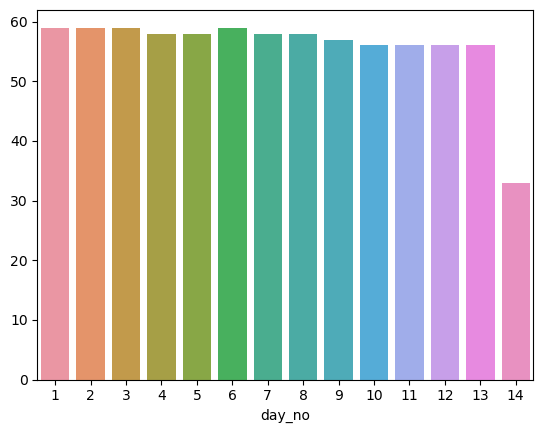

In [8]:
day_no_values= elnino.value_counts("day_no")
sns.barplot(x=day_no_values.index, y=day_no_values.values)

<AxesSubplot:xlabel='air_temperature'>

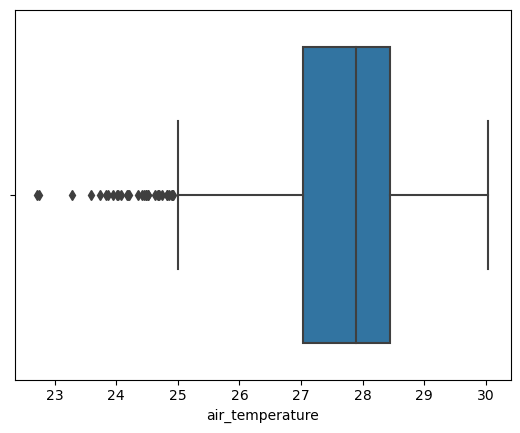

In [9]:
sns.boxplot(data=elnino, x="air_temperature")

<AxesSubplot:xlabel='sea_surface_temperature', ylabel='Count'>

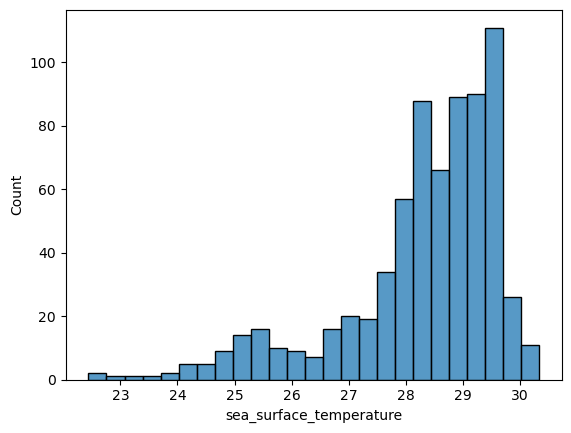

In [10]:
sns.histplot(data=elnino, x="sea_surface_temperature")

In [11]:
elnino_2 = elnino.copy()

In [12]:
elnino_2["zonal_winds"].fillna(elnino_2["zonal_winds"].mean(), inplace= True)

In [13]:
elnino_2["meridional_winds"].fillna(elnino_2["meridional_winds"].mean(), inplace= True)

In [14]:
elnino_2["relative_humidity"].fillna(elnino_2["relative_humidity"].median(), inplace= True)

In [15]:
elnino_2["air_temperature"].fillna(elnino_2["air_temperature"].median(), inplace= True)

In [16]:
elnino_2 = elnino_2.drop(columns=["sea_surface_temperature"])
elnino_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   buoy_no            782 non-null    int64  
 1   day_no             782 non-null    int64  
 2   latitude           782 non-null    float64
 3   longitude          782 non-null    float64
 4   zonal_winds        782 non-null    float64
 5   meridional_winds   782 non-null    float64
 6   relative_humidity  782 non-null    float64
 7   air_temperature    782 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 49.0 KB


In [17]:
elnino_2.isna().sum()

buoy_no              0
day_no               0
latitude             0
longitude            0
zonal_winds          0
meridional_winds     0
relative_humidity    0
air_temperature      0
dtype: int64

In [18]:
elnino_1 = elnino.copy().dropna()

In [19]:
elnino_1.isna().sum()

buoy_no                    0
day_no                     0
latitude                   0
longitude                  0
zonal_winds                0
meridional_winds           0
relative_humidity          0
air_temperature            0
sea_surface_temperature    0
dtype: int64

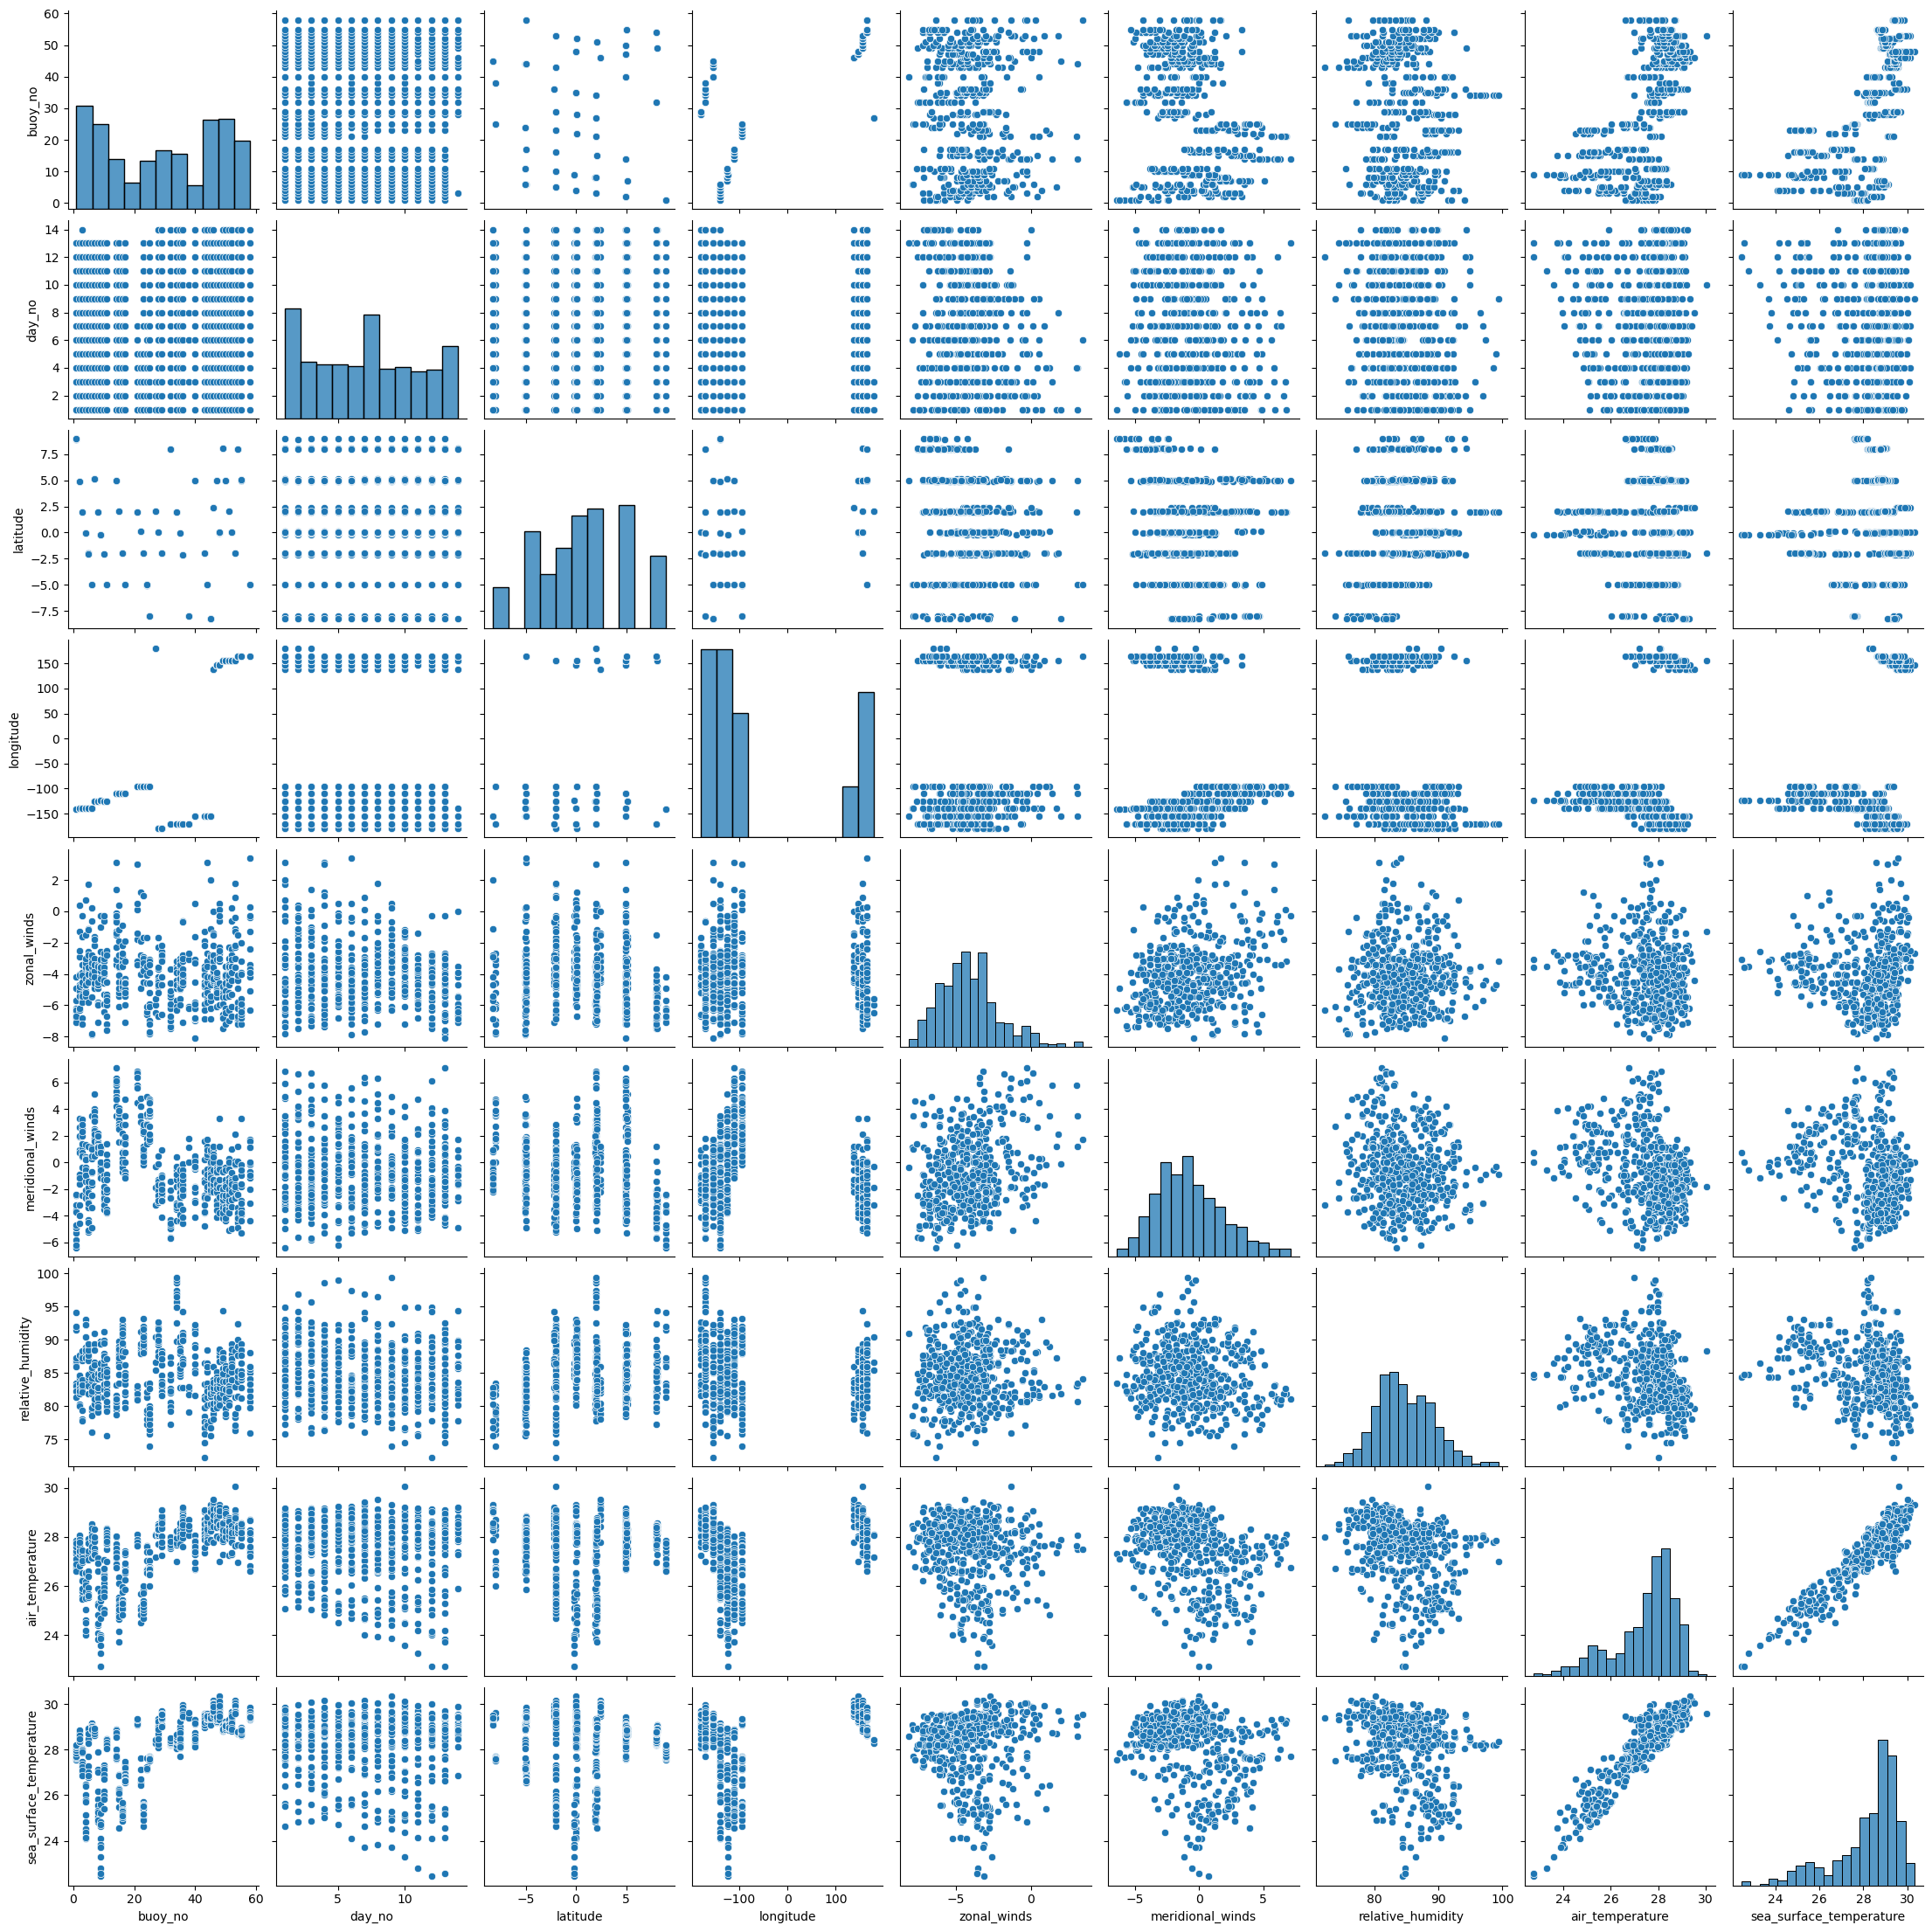

In [20]:
sns.pairplot(elnino_1)

In [21]:
corr = elnino_1.corr()
corr

,buoy_no,day_no,latitude,longitude,zonal_winds,meridional_winds,relative_humidity,air_temperature,sea_surface_temperature
buoy_no,1.000000,0.045103,0.047861,0.681057,-0.041107,-0.296574,-0.097271,0.609500,0.606232
day_no,0.045103,1.000000,0.023141,-0.003734,-0.137484,-0.076285,-0.106903,-0.064778,-0.033219
latitude,0.047861,0.023141,1.000000,0.284257,-0.161338,-0.212177,0.179930,0.072854,0.043396
longitude,0.681057,-0.003734,0.284257,1.000000,0.014271,-0.165742,-0.155278,0.341152,0.346977
zonal_winds,-0.041107,-0.137484,-0.161338,0.014271,1.000000,0.292069,0.037025,-0.132032,0.008062
meridional_winds,-0.296574,-0.076285,-0.212177,-0.165742,0.292069,1.000000,-0.126987,-0.335407,-0.245158
relative_humidity,-0.097271,-0.106903,0.179930,-0.155278,0.037025,-0.126987,1.000000,-0.280910,-0.276526
air_temperature,0.609500,-0.064778,0.072854,0.341152,-0.132032,-0.335407,-0.280910,1.000000,0.926942
sea_surface_temperature,0.606232,-0.033219,0.043396,0.346977,0.008062,-0.245158,-0.276526,0.926942,1.000000


<AxesSubplot:>

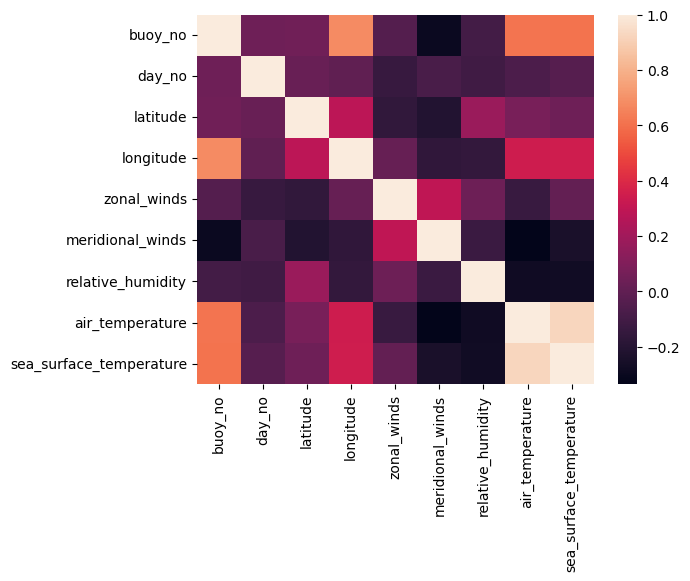

In [22]:
sns.heatmap(corr)

In [23]:
elnino_1["zon_winds_1"] = elnino_1.apply(lambda row: "East" if row["zonal_winds"] > 0 else "West" , axis=1)
elnino_1["mer_winds_1"] = elnino_1.apply(lambda row: "North" if row["meridional_winds"] > 0 else "South" , axis=1)

In [24]:
elnino_1 = elnino_1[['buoy_no', 'day_no', 'latitude', 'longitude', 'zonal_winds','zon_winds_1',
       'meridional_winds','mer_winds_1', 'relative_humidity', 'air_temperature',
       'sea_surface_temperature']]

In [25]:
elnino_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   buoy_no                  533 non-null    int64  
 1   day_no                   533 non-null    int64  
 2   latitude                 533 non-null    float64
 3   longitude                533 non-null    float64
 4   zonal_winds              533 non-null    float64
 5   zon_winds_1              533 non-null    object 
 6   meridional_winds         533 non-null    float64
 7   mer_winds_1              533 non-null    object 
 8   relative_humidity        533 non-null    float64
 9   air_temperature          533 non-null    float64
 10  sea_surface_temperature  533 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 50.0+ KB


In [26]:
for col in ['zon_winds_1', 'mer_winds_1']:
    elnino_1[col] = elnino_1[col].astype('category')

In [27]:
 from sklearn import preprocessing

In [29]:
elnino_1.relative_humidity = preprocessing.scale(elnino_1.relative_humidity)

In [31]:
elnino_1.air_temperature = preprocessing.minmax_scale(elnino_1.air_temperature, feature_range=(-1,1))

In [38]:
import numpy as np

In [62]:
kbins = preprocessing.KBinsDiscretizer(n_bins=4, strategy='uniform', encode='ordinal');
elnino_1["s_s_temp_1"] = kbins.fit_transform(np.array(elnino_1.sea_surface_temperature).reshape(-1, 1)).reshape(-1)

for i in range(4):
    print(f"Interval {i}: {kbins.bin_edges_[0][i + 0]} - {kbins.bin_edges_[0][i + 1]} : {len(elnino_1[elnino_1['s_s_temp_1'] == i])}")

Interval 0: 22.44 - 24.415 : 12
Interval 1: 24.415 - 26.39 : 61
Interval 2: 26.39 - 28.365000000000002 : 142
Interval 3: 28.365000000000002 - 30.34 : 318


In [59]:
def s_s_temp_2(s_s_temp):
    if s_s_temp >= 20 and s_s_temp <= 24:
        return 1
    elif s_s_temp >= 24 and s_s_temp <= 28:
        return 2
    elif s_s_temp >= 28 and s_s_temp <= 32:
        return 3

elnino_1["s_s_temp_2"] = elnino_1["sea_surface_temperature"].apply(s_s_temp_2)

print(elnino_1["s_s_temp_2"].value_counts())

3    374
2    152
1      7
Name: s_s_temp_2, dtype: int64


In [69]:
kbins = preprocessing.KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal');
elnino_1["s_s_temp_3"] = kbins.fit_transform(np.array(elnino_1.sea_surface_temperature).reshape(-1, 1)).reshape(-1)

for i in range(5):
    print(f"Interval {i}: {kbins.bin_edges_[0][i + 0]} - {kbins.bin_edges_[0][i + 1]} : {len(elnino_1[elnino_1['s_s_temp_3'] == i])}")

Interval 0: 22.44 - 27.18 : 106
Interval 1: 27.18 - 28.35 : 106
Interval 2: 28.35 - 28.932 : 108
Interval 3: 28.932 - 29.39 : 104
Interval 4: 29.39 - 30.34 : 109


In [70]:
sample_data = elnino_1.sample(n=100)
sample_data

,buoy_no,day_no,latitude,longitude,zonal_winds,zon_winds_1,meridional_winds,mer_winds_1,relative_humidity,air_temperature,sea_surface_temperature,s_s_temp_1,s_s_temp_2,s_s_temp_3
681,52,7,0.06,156.16,-2.4,West,-2.8,South,1.044060,0.243169,29.43,3.0,3,4.0
517,40,10,4.99,-154.93,-1.6,West,0.5,North,0.149499,0.308743,29.30,3.0,3,3.0
646,49,14,8.08,156.02,-5.5,West,-0.7,South,2.139897,0.248634,28.89,3.0,3,2.0
724,55,8,5.03,165.03,-2.0,West,3.3,North,0.842784,0.437158,28.82,3.0,3,2.0
83,7,3,5.14,-124.87,-1.6,West,0.5,North,0.842784,0.270492,28.66,3.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,51,9,2.08,156.21,-3.6,West,0.0,South,0.149499,0.240437,29.09,3.0,3,3.0
445,35,7,-0.03,-170.02,-4.9,West,-2.3,South,0.328411,0.535519,28.80,3.0,3,2.0
568,44,5,-5.00,-154.99,-5.4,West,-2.0,South,-0.476694,0.595628,29.36,3.0,3,3.0
508,40,1,4.98,-154.94,-6.2,West,-1.8,South,0.999332,0.079235,28.20,2.0,3,1.0
